Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 6 <br>
Date: 10/22/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

## Part 1

For the decision tree in the book in example 8.2, during class I just showed how to calculate the root node Gain(A)
values for A in {income,age,student,credit}.   Also found here: exercise6A_start.pdf Download exercise6A_start.pdf

Hand calculate the Gain(A) values, for each of the 4 attributes, for the left  subtree split (i.e. for the tuples
1,2,8,9 and 11 which are in the "youth" category after the first split.

In [94]:
import math
import pandas as pd

columns = ['RID', 'Age', 'income', 'student', 'credit_rating', 'Class: buys_computer']
data_info = [[1, 'youth', 'high', 'no', 'fair', 'no'],
             [2, 'youth', 'high', 'no', 'excellent', 'no'],
             [3, 'middle_aged', 'high', 'no', 'fair', 'yes'],
             [4, 'senior', 'medium', 'no', 'fair', 'yes'],
             [5, 'senior', 'low', 'yes', 'fair', 'yes'],
             [6, 'senior', 'low', 'yes', 'excellent', 'no'],
             [7, 'middle_aged', 'low', 'yes', 'excellent', 'yes'],
             [8, 'youth', 'medium', 'no', 'fair', 'no'],
             [9, 'youth', 'low', 'yes', 'fair', 'yes'],
             [10, 'senior', 'medium', 'yes', 'fair', 'yes'],
             [11, 'youth', 'medium', 'yes', 'excellent', 'yes'],
             [12, 'middle_aged', 'medium', 'no', 'excellent', 'yes'],
             [13, 'middle_aged', 'high', 'yes', 'fair', 'yes'],
             [14, 'senior', 'medium', 'no', 'excellent', 'no']]

df = pd.DataFrame(data_info, columns=columns)
df = df.set_index("RID")
df

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
3,middle_aged,high,no,fair,yes
4,senior,medium,no,fair,yes
5,senior,low,yes,fair,yes
6,senior,low,yes,excellent,no
7,middle_aged,low,yes,excellent,yes
8,youth,medium,no,fair,no
9,youth,low,yes,fair,yes


In [95]:
subset = df[df["Age"] =="youth"]
subset

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
8,youth,medium,no,fair,no
9,youth,low,yes,fair,yes
11,youth,medium,yes,excellent,yes


$$Info(D) = -\sum_{i=1}^{m} p_ilog_2{p_i}$$ <br>
$$Info_{A}(D)= \sum_{j=1}^{v} \frac{|D_j|}{|D|} \times Info(D_j)$$ <br>
$$Info(D)=-[\frac{2}{5}log_2(\frac{2}{5})] - [\frac{3}{5}log_2(\frac{3}{5})] = 0.9709506$$<br>
$$Gain(A)=Info(D)-Info_{A}(D)$$ <br>

In [96]:
Info_i_D = -((2/5)*math.log(2/5,2))-((3/5)*math.log(3/5,2))
Info_i_D

0.9709505944546686

### Computation of gain ratio for the <i><u>Credit attribute

In [97]:
subset_credit_e = subset[subset['credit_rating'] =="excellent"]
subset_credit_e

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
2,youth,high,no,excellent,no
11,youth,medium,yes,excellent,yes


In [98]:
subset_credit_f = subset[subset['credit_rating'] =="fair"]
subset_credit_f


,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
1,youth,high,no,fair,no
8,youth,medium,no,fair,no
9,youth,low,yes,fair,yes


$$Info_{Credit}(D) =\frac{2}{5} Info_{Credit=Excellent} + \frac{3}{5}Info_{Credit=Fair} = 0.9509775$$ <br>
$$Info_{Credit=Excelent} = -\frac{1}{2}log_2(\frac{1}{2})-\frac{1}{2}log_2(\frac{1}{2}) = 1 $$ <br>
$$Info_{Credit=Fair} = -\frac{1}{3}log_2(\frac{1}{3})-\frac{2}{3}log_2(\frac{2}{3}) = 0.9182958$$ <br>
$$Info_{Credit}(D) =\frac{2}{5}[-\frac{1}{2}log_2(\frac{1}{2})-\frac{1}{2}log_2(\frac{1}{2})] + \frac{3}{5}[-\frac{1}{3}log_2(\frac{1}{3})-\frac{2}{3}log_2(\frac{2}{3})] = 0.9509775$$ <br>
$$Gain(Credit\ Rating) = Info(D)- Info_{income}(D) = 0.01997309$$
$$Gain(Credit\ Rating) = 0.9709506 - 0.9509775 = 0.01997309$$

In [99]:
Info_Credit_Fair = -((1/3)*math.log(1/3,2))-((2/3)*math.log(2/3,2))
Info_Credit_Fair

0.9182958340544896

In [100]:
Info_Credit_Excellent = -((1/2)*math.log(1/2,2))-((1/2)*math.log(1/2,2))
Info_Credit_Excellent

1.0

In [101]:
Info_Credit = ((2/5)*Info_Credit_Excellent) + ((3/5)*Info_Credit_Fair)
Info_Credit

0.9509775004326937

In [102]:
Gain_Credit = Info_i_D-Info_Credit
Gain_Credit

0.01997309402197489

### Computation of gain ratio for the <i><u>Student attribute

In [103]:
subset_student_y = subset[subset["student"] == "yes"]
subset_student_y

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
9,youth,low,yes,fair,yes
11,youth,medium,yes,excellent,yes


In [104]:
subset_student_n = subset[subset["student"] == "no"]
subset_student_n

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
8,youth,medium,no,fair,no


$$Info_{Student}(D) =\frac{2}{5} Info_{Student=Yes} + \frac{3}{5}Info_{Student=No} = 0$$ <br>
$$Info_{Student=Yes} = -\frac{2}{2}log_2(\frac{2}{2})-\frac{0}{2}log_2(\frac{0}{2})= 0$$ <br>
$$Info_{Student=No} = -\frac{0}{3}log_2(\frac{0}{3})-\frac{3}{3}log_2(\frac{3}{3})= 0$$ <br>
$$Info_{Student}(D) =\frac{2}{5}[-\frac{2}{2}log_2(\frac{2}{2})-\frac{0}{2}log_2(\frac{0}{2})] + \frac{3}{5}[-\frac{0}{3}log_2(\frac{0}{3})-\frac{3}{3}log_2(\frac{3}{3})] = 0$$ <br>
$$Gain(Student) = Info(D)- Info_{Student}(D) = 0.9709506$$ <br>
$$Gain(Student) = 0.9709506 - 0 = 0.9709506$$ <br>

In [105]:
Info_Student = 0
Gain_Student = Info_i_D - Info_Student
Gain_Student

0.9709505944546686

### Computation of gain ratio for the <i><u>Income attribute


In [106]:
subset_income_high = subset[subset["income"] == "high"]
subset_income_high

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no


In [107]:
subset_income_medium = subset[subset["income"] == "medium"]
subset_income_medium

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
8,youth,medium,no,fair,no
11,youth,medium,yes,excellent,yes


In [108]:
subset_income_low = subset[subset["income"] == "low"]
subset_income_low

,Age,income,student,credit_rating,Class: buys_computer
RID,,,,,
9,youth,low,yes,fair,yes


$$Info_{Income}(D) =\frac{1}{5} Info_{Income=Low} + \frac{2}{5}Info_{Income=Medium} + \frac{2}{5}Info_{Income=High} = .4 $$ <br>
$$Info_{Income=Low} = -\frac{1}{1}log_2(\frac{1}{1}) -\frac{0}{1}log_2(\frac{0}{1}) = 0 $$ <br>
$$Info_{Income=Medium} = -\frac{1}{2}log_2(\frac{1}{2}) -\frac{1}{2}log_2(\frac{1}{2}) = 1 $$ <br>
$$Info_{Income=High} = -\frac{0}{2}log_2(\frac{0}{2}) -\frac{2}{2}log_2(\frac{2}{2}) = 0$$ <br>
$$Info_{Income}(D) =\frac{1}{5}[-\frac{1}{1}log_2(\frac{1}{1}) -\frac{0}{1}log_2(\frac{0}{1})] + $$ <br>
$$\frac{2}{5}[-\frac{1}{2}log_2(\frac{1}{2}) -\frac{1}{2}log_2(\frac{1}{2})] + $$ <br>
$$\frac{2}{5}[-\frac{0}{2}log_2(\frac{0}{2}) -\frac{2}{2}log_2(\frac{2}{2})] = .4 $$ <br>
$$Gain(Income) = Info(D)- Info_{Income}(D) =  0.5709506$$ <br>
$$Gain(Income) = 0.9709506 - .4 =  0.5709506$$ <br>

In [109]:
Info_Income_Low = 0
Info_Income_High = 0
Info_Income_Medium = -((1/2)*math.log(1/2,2))-((1/2)*math.log(1/2,2))
Info_Income_Medium

1.0

In [110]:
Info_Income = ((1/5)*Info_Income_Low) + ((2/5)*Info_Income_Medium) + ((2/5)*Info_Income_High)
Info_Income

0.4

In [111]:
Gain_Income = Info_i_D - Info_Income
Gain_Income

0.5709505944546686

## Comparing all of the Gain's together <br>
$$Gain(Student) = 0.9709506 - 0 = 0.9709506$$ <br>
$$Gain(Income) = 0.9709506 - .4 =  0.5709506$$ <br>
$$Gain(Credit\ Rating) = 0.9709506 - 0.9509775 = 0.01997309$$ <br>
<br>
These are all of the subtree splits on the left of the tree in which is under "youth"
The next split that we will want to make is off of student as it has the highest gain value

## Part 2
You are to create a set of 8..12 training tuples, including the classification of each, and then run through sklearn to
 build a decision and print out the resultant decision tree.  You should craft your tuples and classification array such
  that the decision tree has at least 3 levels (including the root) and explain which tuples end up in which leaf level
   node.  Feel free to draw a picture or use the graph viewer if you prefer. <br><br>
The problem is to classify college student applicants based on likelihood of finishing in 6 years as "yes" or "no".
Assume a tuple has the following information: <br>

[GPA, RANK, WORKED]
where: GPA = high school grade point average

RANK = rank in class expressed as a decimal percentile (e.g. 0.99 means top 99%)

WORKED =  { 0 , 1} where 0 means did not work a job in HS, 1 means did

For example:

[3.4,0.85,1] means an applicant has a 3.4 gpa, was in the top 85 percentile, and worked while in high school.

In [112]:
# Importing Libraries

import pandas as pd
import random
import numpy as np
import graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

### Setting Up Random Data to have biases
GPA's are assigned randomly in between a scale of 1 and 4

In [113]:
# Setting Random Seed
random.seed(16)

# Creating a list of 12 Random GPAS
GPA = [round(random.uniform(1, 4), 2) for _ in range(12)]  # Creating List of Random GPA
GPA_testing = [round(random.uniform(1, 4), 2) for _ in range(12)]
print("GPA's", GPA)
print("GPA's Testing", GPA_testing)

GPA's [2.08, 2.44, 2.25, 2.34, 2.23, 2.97, 1.78, 2.9, 1.03, 1.91, 2.01, 1.43]
GPA's Testing [3.23, 1.93, 3.37, 3.87, 1.76, 3.68, 3.42, 3.0, 1.08, 2.37, 2.88, 1.89]


Rankings are assigned on tier basis. Within those tiers there is some variability <br>
-If the GPA is above 3.5 the student is in the top 90-100% <br>
-If the GPA is above 3.0 but below 3.5 the student is in the top 80-90% <br>
-If the GPA is above 2.5 but below 3 the student is in the top 70-80% <br>
-If the GPA is above 2.0 but below 2.5 the student is in the top 60-70% <br>
-If the GPA is below 2.0 the student is in the bottom 0-60% <br>

In [114]:
def get_rankings(GPA):
    """This Function Randomizes rankings with weights"""
    RANK = []
    for grade in GPA:
        if grade > 3.5:
            RANK.append(round(random.uniform(.9, 1), 2))
        elif grade > 3:
            RANK.append(round(random.uniform(.8, .9), 2))
        elif grade > 2.5:
            RANK.append(round(random.uniform(.7, .8), 2))
        elif grade > 2:
            RANK.append(round(random.uniform(.6, .7), 2))
        else:
            RANK.append(round(random.uniform(0, .6), 2))
    return RANK

RANK = get_rankings(GPA)
RANK_testing = get_rankings(GPA_testing)

print("Rankings", RANK)
print("Ranking Testing", RANK_testing)

Rankings [0.62, 0.63, 0.63, 0.68, 0.63, 0.74, 0.39, 0.79, 0.18, 0.03, 0.7, 0.5]
Ranking Testing [0.88, 0.31, 0.82, 0.92, 0.18, 0.95, 0.81, 0.77, 0.44, 0.6, 0.78, 0.29]


For assigning working values. 1 indicates that the student did work, 0 indicates the student did not. <br>
-If the students GPA is above 2.0, there is a random 0-60 value assigned. If that value is above 50 they did work. <br>
-If the students GPA is below 2.0, there is a random 30-100 value assigned. If that value is above 50 they did work.

In [115]:
# Setting up Random Work 0 did not work 1 did, Scaling it toward working have lower GPA
def get_working(GPA):
    """Determining if they worked based off of GPA, with some randomness"""
    WORKED = []
    for num in enumerate(GPA):
        if num[1] > 2:
            rand_work = random.randint(0, 60)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
        else:
            if random.randint(30, 100) > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
    return  WORKED

WORKED = get_working(GPA)
WORKED_testing = get_working(GPA_testing)
print("Worked", WORKED)
print("Worked Testing", WORKED_testing)

Worked [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
Worked Testing [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]


Compressing the GPA, RANKING and WORKED into a list

In [116]:
def compress_list(GPA, RANK, WORKED):
    """Compressing the lists"""
    list_o_list = []
    for num in range(len(GPA)):
        list_o_list.append([GPA[num], RANK[num], WORKED[num]])
    return list_o_list

list_o_list = compress_list(GPA, RANK, WORKED)
list_o_training = compress_list(GPA_testing, RANK_testing, WORKED_testing)
print("List_o_list", list_o_list)
print("List_o_training", list_o_training)

List_o_list [[2.08, 0.62, 1], [2.44, 0.63, 1], [2.25, 0.63, 0], [2.34, 0.68, 0], [2.23, 0.63, 0], [2.97, 0.74, 0], [1.78, 0.39, 1], [2.9, 0.79, 1], [1.03, 0.18, 0], [1.91, 0.03, 1], [2.01, 0.7, 0], [1.43, 0.5, 0]]
List_o_training [[3.23, 0.88, 0], [1.93, 0.31, 1], [3.37, 0.82, 1], [3.87, 0.92, 0], [1.76, 0.18, 1], [3.68, 0.95, 0], [3.42, 0.81, 0], [3.0, 0.77, 0], [1.08, 0.44, 1], [2.37, 0.6, 0], [2.88, 0.78, 0], [1.89, 0.29, 1]]


Graduating in 6 years is based on the sum of GPA, RANK and WORKED. <br>
If the sum of these three variables is above 3, They graduate with in 6 years <br>
Graduate Training is made so that we can see how well our decision tree works

In [117]:
def grad_in_6(list_o_list):
    """Creating a classifier if they graduate in 6 years """
    graduate = []
    for person in enumerate(list_o_list):
        if sum(person[1]) > 3:
            graduate.append(1)
        else:
            graduate.append(0)
    return graduate

graduate = grad_in_6(list_o_list)
graduate_training = grad_in_6(list_o_training)

print('Graduate', graduate)
print('Graduate Training', graduate_training)

Graduate [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Graduate Training [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]


First Example

In [118]:
X = list_o_list
Y = graduate
labels = ["GPA", "RANK", "WORKED"]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
print(type(clf))
print(clf)

foo = clf.predict_proba(list_o_training)

print("output of classifying 4 new items (should be): ", graduate_training)
foo = pd.DataFrame(data=foo, columns=["Something","Graduate"])
predict_graduating = foo["Graduate"].to_list()
predict_graduating = [int(i) for i in predict_graduating]
print(predict_graduating)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier()
output of classifying 4 new items (should be):  [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


Second Example


In [119]:
Xnum = list_o_list
classifications = graduate
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(Xnum,classifications)
print(type(clf2))
print(clf2)

print("\nNow 'predicting class' of the first 6 elements of the training data.")
testData = list_o_training
foo = clf2.predict_proba( testData )
print("test data = " + str(testData))
print("data are classified as:")
print(foo)

treeStruct = export_text(clf2)
print("\nNow printing export_text(clf2)")
print(treeStruct)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(criterion='entropy')

Now 'predicting class' of the first 6 elements of the training data.
test data = [[3.23, 0.88, 0], [1.93, 0.31, 1], [3.37, 0.82, 1], [3.87, 0.92, 0], [1.76, 0.18, 1], [3.68, 0.95, 0], [3.42, 0.81, 0], [3.0, 0.77, 0], [1.08, 0.44, 1], [2.37, 0.6, 0], [2.88, 0.78, 0], [1.89, 0.29, 1]]
data are classified as:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]

Now printing export_text(clf2)
|--- feature_0 <= 2.29
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.21
|   |   |   |--- class: 1
|--- feature_0 >  2.29
|   |--- class: 1



clf2.apply( Xnum ):
[5 6 2 6 2 6 5 6 2 4 2 2]

Now printing each tuple with the decision tree node it ends up in:
[2.08, 0.62, 1],5
[2.44, 0.63, 1],6
[2.25, 0.63, 0],2
[2.34, 0.68, 0],6
[2.23, 0.63, 0],2
[2.97, 0.74, 0],6
[1.78, 0.39, 1],5
[2.9, 0.79, 1],6
[1.03, 0.18, 0],2
[1.91, 0.03, 1],4
[2.01, 0.7, 0],2
[1.43, 0.5, 0],2


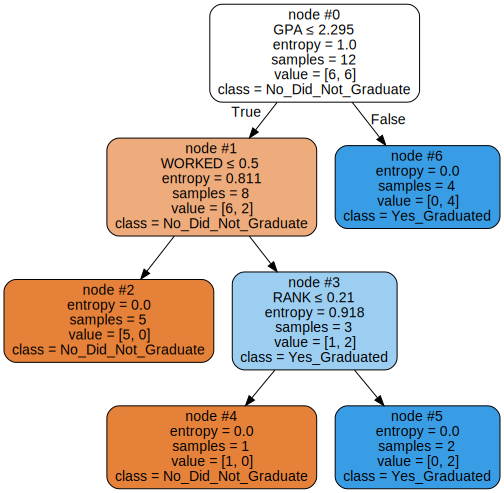

In [120]:
foo = clf2.apply( Xnum )   # passing in full list of training tuples
print("clf2.apply( Xnum ):")
print(foo)
# now print out line by line as pair:  tuple, which leaf node
print("\nNow printing each tuple with the decision tree node it ends up in:")
for i in range(len(foo)):
    print(str(Xnum[i]) + "," + str(foo[i]))

# NOTE - adding in node_ids and class_names as options to make tree viz more robust
dot_data = tree.export_graphviz(clf2, node_ids="true",
                                feature_names=labels,
                                class_names=('No_Did_Not_Graduate','Yes_Graduated'),
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

graph

Example 3 Creating a tree with "gini" instead of entropy

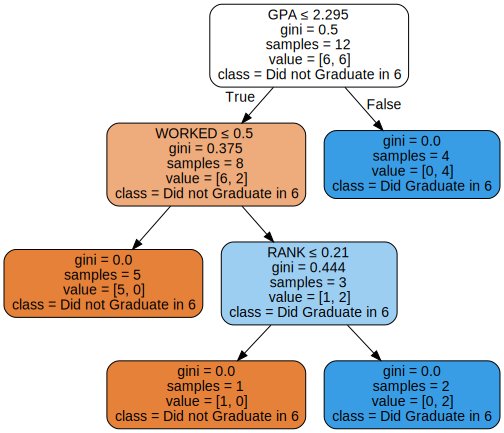

In [121]:
clf3 = tree.DecisionTreeClassifier(criterion="gini")
clf3 = clf3.fit(Xnum,classifications)
dotData3 = tree.export_graphviz(clf3,
                                feature_names=labels,
                                class_names=("Did not Graduate in 6", "Did Graduate in 6"),
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
foo = clf3.predict_proba(Xnum)

graph = graphviz.Source(dotData3)
graph